In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# 1-Create Dataset
Verisetini kendimiz oluşturacağımız için k sayısını ve haliyle sınıf sayısını 3 olara belirledik.

- normal=gaussian.normal(25, 5, 1000) 

- 25 ortalamaya sahip, 5 sigmaya sahip(20 ile 30 arasında değerler olacak), 1000 tane rasgele veri üret.

In [2]:
# class1 2 feature
x1 = np.random.normal(25, 5, 100)
y1 = np.random.normal(25, 5, 100)

# class2
x2 = np.random.normal(55, 5, 100)
y2 = np.random.normal(60, 5, 100)

# class3
x3 = np.random.normal(55, 5, 100)
y3 = np.random.normal(15, 5, 100)

In [3]:
x = np.concatenate((x1, x2, x3), axis = 0) #yukarıdan aşağı merge et. 
y = np.concatenate((y1, y2, y3), axis = 0)

dictionary = {"x":x, "y":y}

data = pd.DataFrame(dictionary)
data.head()

,x,y
0,26.894102,31.672449
1,26.183077,15.891294
2,15.042764,22.587380
3,20.486141,31.713876
4,23.031970,13.409704


In [4]:
data.describe()

,x,y
count,300.000000,300.000000
mean,44.996318,33.215365
std,15.034707,19.996420
min,11.482837,4.205034
25%,28.366212,17.135024
50%,51.852213,24.890741
75%,56.592940,56.761493
max,70.430548,70.392530


# 2- Visualize Data

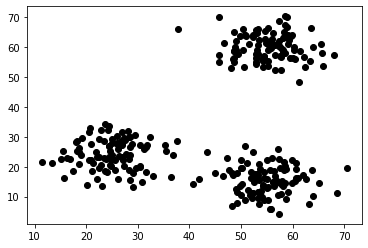

In [5]:
plt.scatter(x1, y1, color = "black")
plt.scatter(x2, y2, color = "black")
plt.scatter(x3, y3, color = "black")
plt.show()

# 3- Create and Visualize Denrogram Model

### Note
- Bu plota göre **kendisini kesmeyen maximum distance** bulunur. 
- Örneğin 300-50=250, 500-300=200'dür yani 250>200. 
- Dolayısıyla yeşil kenarı alırız. 
- Bu kenarın üzerinden geçecek, yatay bir şekilde bir threshold olarak adlandırdığımız bir line çizdiğimizde ve bu line'ın **3** noktayı kestiğini görürüz. 
- Dolayısıyla **3** tane cluster'a ayırırız.

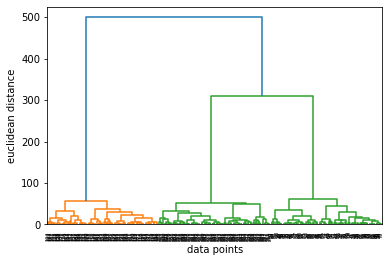

In [6]:
merg = linkage(data, method="ward") # linkage=dendogramı çizdiren algoritma, method=ward: yayılımları minimize et demek.
dendrogram(merg, leaf_rotation = 90) # leaf_rotation = 90 => x eksenindeki labelları dik yazıya çevirir.
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

## 4-Create Hierartical Model

### Note
Yukarıdaki dendogramda cluster sayısını **3** bulduğumuz için aşağıda **n_clusters**, **3** olarak belirtilir.

In [7]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3, affinity= "euclidean", linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(data) # hem modeli hem clusterları oluşturur
data["label"] = cluster # data'ya label adında bir sütun oluştururuz.
data.head(5)

,x,y,label
0,26.894102,31.672449,0
1,26.183077,15.891294,0
2,15.042764,22.587380,0
3,20.486141,31.713876,0
4,23.031970,13.409704,0


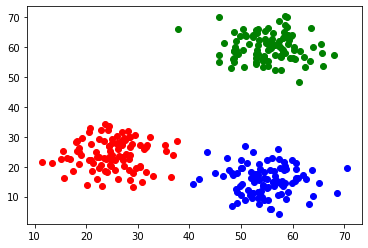

In [8]:
plt.scatter(data.x[data.label == 0 ], data.y[data.label == 0], color = "red")
plt.scatter(data.x[data.label == 1 ], data.y[data.label == 1], color = "green")
plt.scatter(data.x[data.label == 2 ], data.y[data.label == 2], color = "blue")
plt.show()